In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [52]:
data = pd.read_csv("data_gas_3.csv")

# Se escogió un dataset con 2229 instancias y 129 dimensiones con 6 clases que corresponden a la detección de 6 gases por un sensor

In [53]:
#El dataset reune información de un sensor de gases e identifica 6 gases con 129 parametros internos.
#los gases están numerados en el dataset de la siguiene manera:
#1: Ethanol; 2: Ethylene; 3: Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene

gases = np.array(['','Ethanol', 'Ethylene', 'Ammonia', 'Acetaldehyde', 'Acetone', 'Toluene'])

data = data.drop(['U'],axis=1)
X = data.drop(['Gas'],axis=1)
Y = data['Gas']

In [54]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

In [55]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Regularización con L1

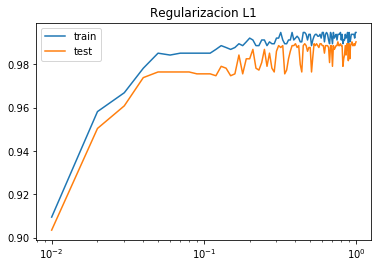

In [56]:
f1_score_l1 = []
f1_score_test_l1 = []

C_value = np.linspace(0.01,1,100)

for ii in C_value:

    clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1, C=ii)
    clf.fit(x_train, y_train)
    f1_score_l1.append(sklearn.metrics.f1_score(y_train, clf.predict(x_train), average='micro'))
    f1_score_test_l1.append(sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='micro'))
#    print(ii)
    
plt.figure()
plt.plot(C_value,f1_score_l1, label = "train")
plt.plot(C_value,f1_score_test_l1,label="test" )
plt.xscale('log')
plt.title("Regularizacion L1")
plt.legend()

# Regularización con L2

In [57]:
f1_score_l2 = []
f1_score_test_l2 = []

C_value = np.linspace(0.01,1,100)

for ii in C_value:

    clf = LogisticRegression(penalty='l2', solver='saga', tol=0.1, C=ii)
    clf.fit(x_train, y_train)
    f1_score_l2.append(sklearn.metrics.f1_score(y_train, clf.predict(x_train), average='micro'))
    f1_score_test_l2.append(sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='micro'))
#    print(ii)
    


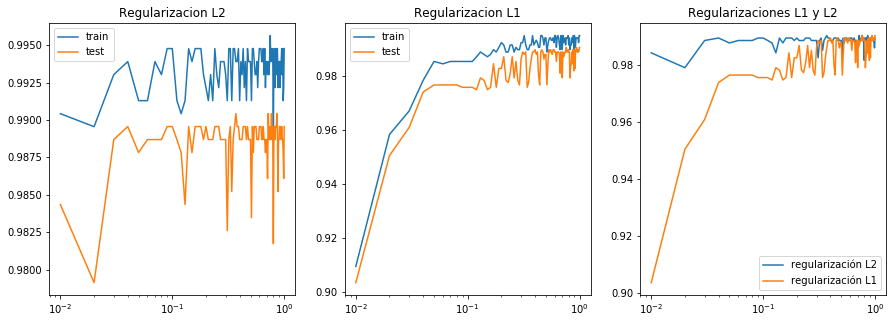

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(C_value,f1_score_l2, label = "train")
plt.plot(C_value,f1_score_test_l2,label="test" )
plt.xscale('log')
plt.title("Regularizacion L2")
plt.legend() 
plt.subplot(1,3,2)
plt.plot(C_value,f1_score_l1, label = "train")
plt.plot(C_value,f1_score_test_l1,label="test" )
plt.xscale('log')
plt.title("Regularizacion L1")
plt.legend() 
plt.subplot(1,3,3)
plt.plot(C_value,f1_score_test_l2, label = "regularización L2")
plt.plot(C_value,f1_score_test_l1,label="regularización L1" )
plt.xscale('log')
plt.title("Regularizaciones L1 y L2")
plt.legend()   

# Regularización L2 en un rango de C mas cerca a cero

In [ ]:
f1_score_l2 = []
f1_score_test_l2 = []

C_value = np.linspace(0.0001,0.001,100)

for ii in C_value:

    clf = LogisticRegression(penalty='l2', solver='saga', tol=0.1, C=ii)
    clf.fit(x_train, y_train)
    f1_score_l2.append(sklearn.metrics.f1_score(y_train, clf.predict(x_train), average='micro'))
    f1_score_test_l2.append(sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='micro'))
#    print(ii)
    
plt.figure()
plt.plot(C_value,f1_score_l2, label = "train")
plt.plot(C_value,f1_score_test_l2,label="test" )
plt.xscale('log')
plt.title("Regularizacion L2 entre C=0.0001 y C=0.001")
plt.legend()   

# Matriz de confusión con L1 y C=0.2 obtenido con la gráfica f1vsC para L1

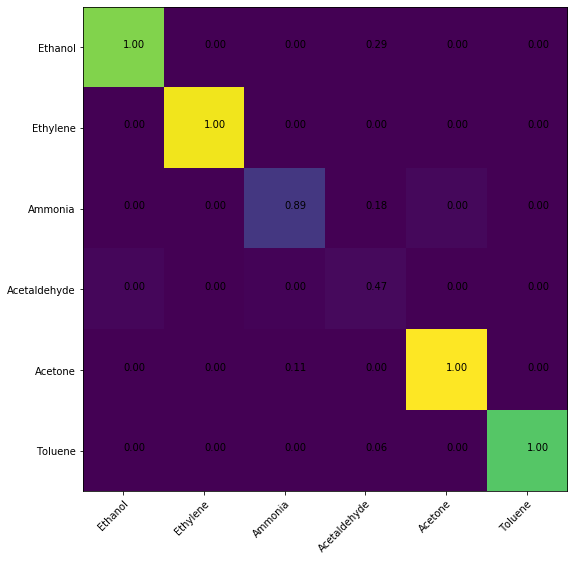

In [49]:
clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1, C=0.2)
clf.fit(x_train, y_train)

y_prediction = clf.predict(x_test)
numeros = np.arange(1,7)    
c_matrix = confusion_matrix(y_test, y_prediction, labels = numeros)

#plt.title("C from 0.01 to 10")

fig,ax = plt.subplots(figsize=(8,8))
im = ax.imshow(c_matrix)
for i in range(6):
    for j in range(6):    
        plt.text(i, j, "{:.2f}".format( c_matrix[i,j]/np.sum(c_matrix[i,:]) ))
ax.set_xticklabels(gases)
ax.set_yticklabels(gases)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.savefig("confusion.png")